In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import lvmnebular
import numpy as np
import matplotlib.pyplot as plt

In [9]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_5e-14',900) #native simulation
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True) #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True) #snbin simulation

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/outputs/Bubble_v2_5e-14_linear_full_900_flux.fits
no.of bins: 169


In [10]:
#native simulation
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim

#u.fitlines(sys_vel=20, lines0= np.array([ 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=False, plot=True) #native sim

#voronoibin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim

#radbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=True, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #radbin sim

#snbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069,7320, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim


Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '7331' '6731' '6717' '6584' '6563' '6548'
 '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729'
 '3726']
linefitfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_linefits.fits


In [20]:
print(np.min(u.vals[0]))
print(np.any(u.R>np.min(u.vals[0])))

3.6676561314614213
True


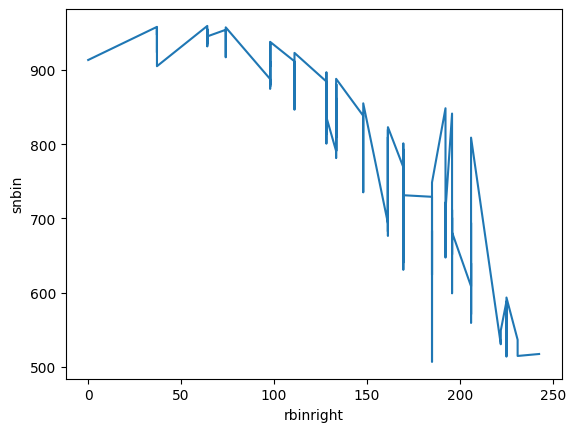

In [5]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
#print(u.snbinned_flux, u.flux)


78
[[ 1.88423089e-14  8.18830985e-15 -1.22387435e-14 ...  2.06153060e-15
   1.64401440e-15 -7.84160317e-15]
 [ 1.00003319e-14 -2.76717299e-15  3.19812599e-15 ... -3.69921353e-15
  -2.96248757e-14 -3.90101617e-15]
 [-1.83954143e-14 -4.03355904e-15 -4.18680559e-14 ... -5.11214400e-16
  -9.01912890e-15 -1.12372058e-14]
 ...
 [ 1.52496153e-14  4.76286660e-14 -1.99361469e-14 ...  5.28573123e-16
  -1.11238669e-14 -4.97769720e-14]
 [ 2.47284442e-14 -4.92944444e-14  3.74178939e-14 ...  1.15654641e-14
  -3.67776014e-14 -2.21244684e-14]
 [ 8.69585369e-15  1.08212203e-14  6.88630468e-14 ... -6.23591331e-15
   1.27269654e-15  1.95426747e-14]]


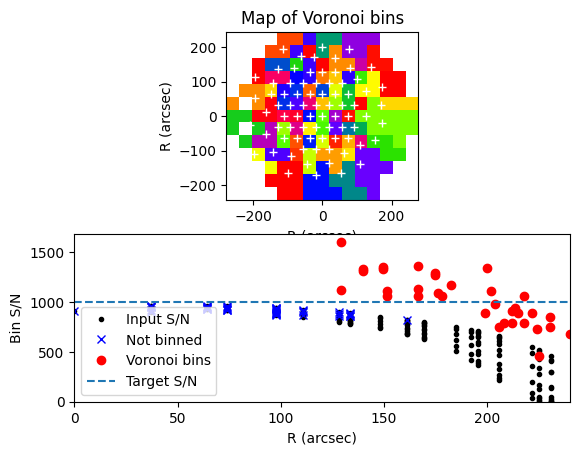

In [6]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [12]:
u.runpyneb(niter=4, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:355: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:372: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:388: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:407: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:424: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:442: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:456: RuntimeWarning: Mean of empty

In [18]:
u.projectedTe(u.vals[5])
print(u.Teproj, u.aproj)

[          nan 4274.23471851 4796.77359748 5216.68203955 5558.79340484
 5772.52932097 5936.49260122 6076.51730615 6176.77206555 6265.91992839
 6334.80517474 6389.5076815  6440.23382527 6478.70111016 6513.68390387
 6542.75300815 6565.89498413 6584.53548286 6600.1946824  6613.0921974
 6623.48820105 6626.77858857 6629.78612128 6629.85604869 6629.13761796
 6628.49342614 6628.60478948 6630.52822851 6633.82465928 6637.17800479
 6640.83583072 6645.41823317 6649.86570206 6654.97862701 6661.27515078
 6667.07137731 6673.59732142 6679.36378406 6684.42681719 6689.21888633
 6694.71383831 6700.77117853 6707.6103025  6714.78752642 6722.62284656
 6730.62142804 6739.93489866 6749.51199412 6759.04354848 6768.70695879
 6778.68255984 6788.97300402 6799.73991595 6811.64551324 6824.57965275
 6837.33888614 6849.91595622 6863.0028849  6876.25689012 6890.38447698
 6904.78808425 6919.92525174 6935.34354919 6951.60872505 6967.92299646
 6984.51188805 7000.8550799  7017.71836792 7035.0262331  7053.1325847
 7071.49

tl: 0.8333232471946752 
 12+log10(O+/H+): 8.45231068265711


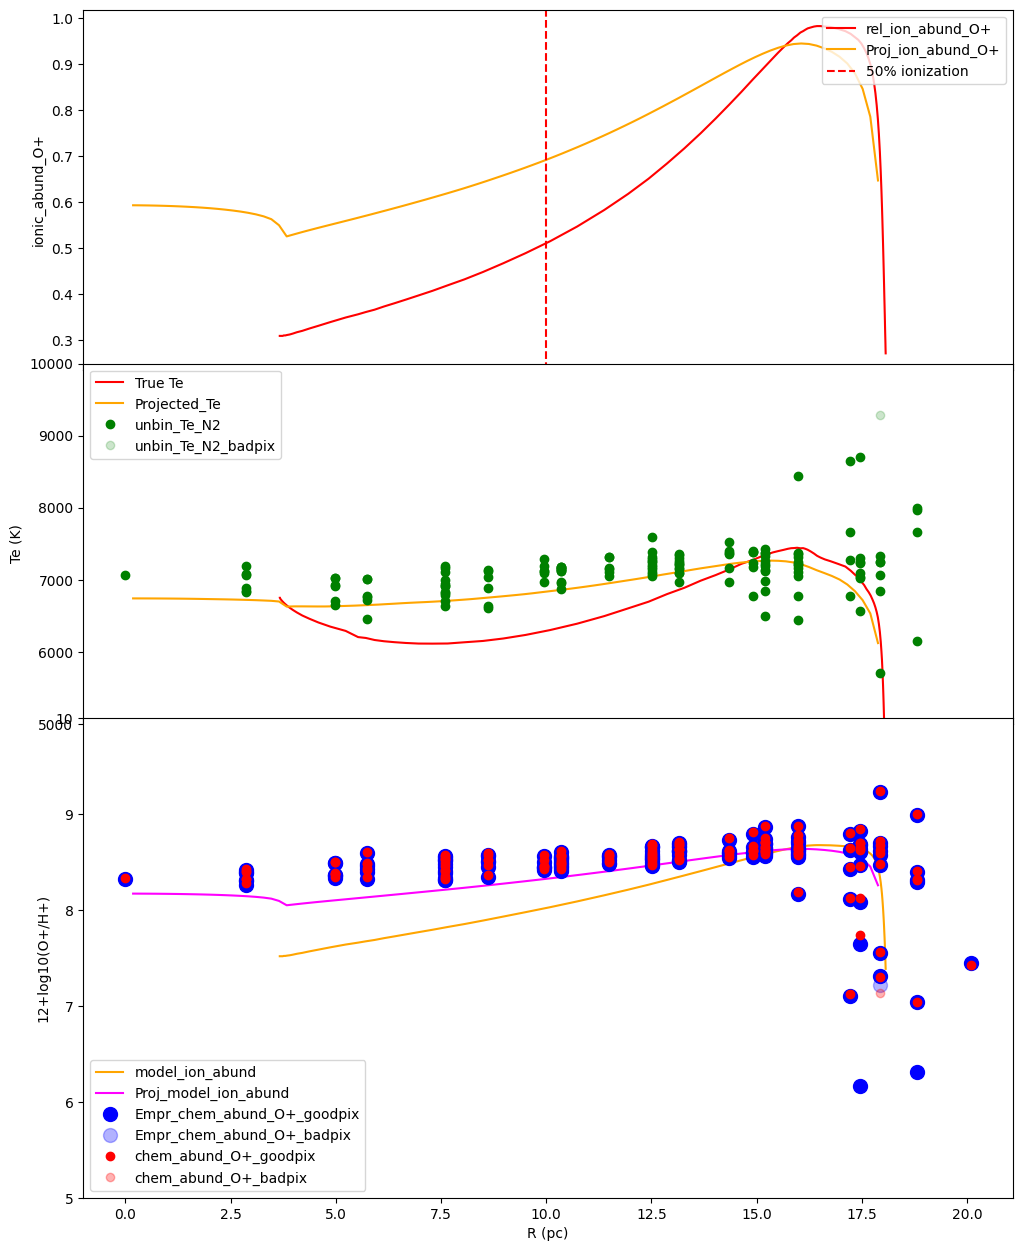

In [40]:
import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

#O+ 
u.projectedTe(u.vals[5], n=100) 
u.chem_abund(3726)

#Chemical abundances of O+ and O++ from paper2 by Perez Montero 
I_3726=u.linefitdict['3726_flux'] 
I_3729=u.linefitdict['3729_flux'] 
I_4861=u.linefitdict['4861_flux'] 
Tl=u.linefitdict['TeN2']/1e4 
#Tl=1
TeN2=u.linefitdict['TeN2']

#Emperical formula to compute chemical abund  
Abund_O2=np.log10(np.divide((I_3726+I_3729),I_4861))+5.887+np.divide(1.641,Tl)-0.543*np.log10(Tl)+0.000114*u.linefitdict['neO2']
print('tl:', np.nanmean(Tl),'\n','12+log10(O+/H+):', np.nanmean(Abund_O2)) 

good=u.linefitdict['3726_flux']/u.linefitdict['3726_flux_err']>=3  
bad=u.linefitdict['3726_flux']/u.linefitdict['3726_flux_err']<3  

#Plots
fig, (ax3, ax4, ax5)=plt.subplots(3, 1, sharex=True, figsize=(12,12))  
ax3.plot(u.vals[0], u.vals[5], color='red', label='rel_ion_abund_O+')  
ax3.plot(u.R[1:], u.aproj[1:], color='orange', label='Proj_ion_abund_O+')  
ax3.axvline(x=10, c='red', linestyle='--', label='50% ionization')  
ax3.legend(loc='upper right')  
ax3.set_ylabel('ionic_abund_O+') 
  
# Electron temperature plots   
ax4.plot(u.vals[0], u.vals[1], color='red', label='True Te')  
ax4.plot(u.R, u.Teproj, color='orange', label='Projected_Te')  
ax4.plot(rad[good], TeN2[good], 'o', color='green', label='unbin_Te_N2')  
ax4.plot(rad[bad], TeN2[bad], 'o', color='green', label='unbin_Te_N2_badpix', alpha=0.2)  
ax4.set_ylim(5000, 10000)
ax4.set_ylabel('Te (K)')  
ax4.legend()     
  
# O++ ionic abundance  
Zmodel=1   # cloudy model abundance relative to solar  
logOHsun= -3.31  # solar abundance patter from GASS (Grevesse et al 2010)  
logOHmodel = logOHsun + np.log(Zmodel) # total Oxygen elemental abundance in the model  
logOppHmodel = logOHmodel+np.log(u.vals[5]) # ionic abundance of O+ in the model  
logOppHproj = logOHmodel+np.log(u.aproj[1:]) # ionic abundance of O+ in the model  ############################### highliting because I put aproj[1:]
  
ax5.plot(u.vals[0], 12+logOppHmodel, color='orange', label='model_ion_abund')  
ax5.plot(u.R[1:], 12+logOppHproj, color='magenta', label='Proj_model_ion_abund')   
  
ax5.plot(rad[good], Abund_O2[good], 'o', color='blue', markersize='10', label='Empr_chem_abund_O+_goodpix')  
ax5.plot(rad[bad], Abund_O2[bad], 'o', color='blue', markersize='10', label='Empr_chem_abund_O+_badpix', alpha=0.3)  
ax5.plot(rad[good], 12+np.log10(u.OppH)[good], 'o', color='red', label='chem_abund_O+_goodpix')  
ax5.plot(rad[bad], 12+np.log10(u.OppH)[bad], 'o', color='red', label='chem_abund_O+_badpix', alpha=0.3)  
ax5.set_ylim(5, 10)
ax5.set_xlabel('R (pc)')  
ax5.set_ylabel('12+log10(O+/H+)')  
ax5.legend(loc='lower left')     
  
ax3.set_position([0.125, 0.89, 0.775, 0.3])  # [left, bottom, width, height]  
ax4.set_position([0.125, 0.595, 0.775, 0.3])   
ax5.set_position([0.125, 0.2, 0.775, 0.4])  
    
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_plotprofile/unbin_TeN2_chem_abundO2_vs_R.png', dpi=300)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show() 

/home/amrita/LVM/lvmnebular/lvmnebular.py:767: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:768: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*np.cos(theta)**(-2), x=theta)/trapezoid(np.cos(theta)**(-2), x=theta)


th: 0.8604658715939872 
 12+log10(O++/H+): 7.488408592839551


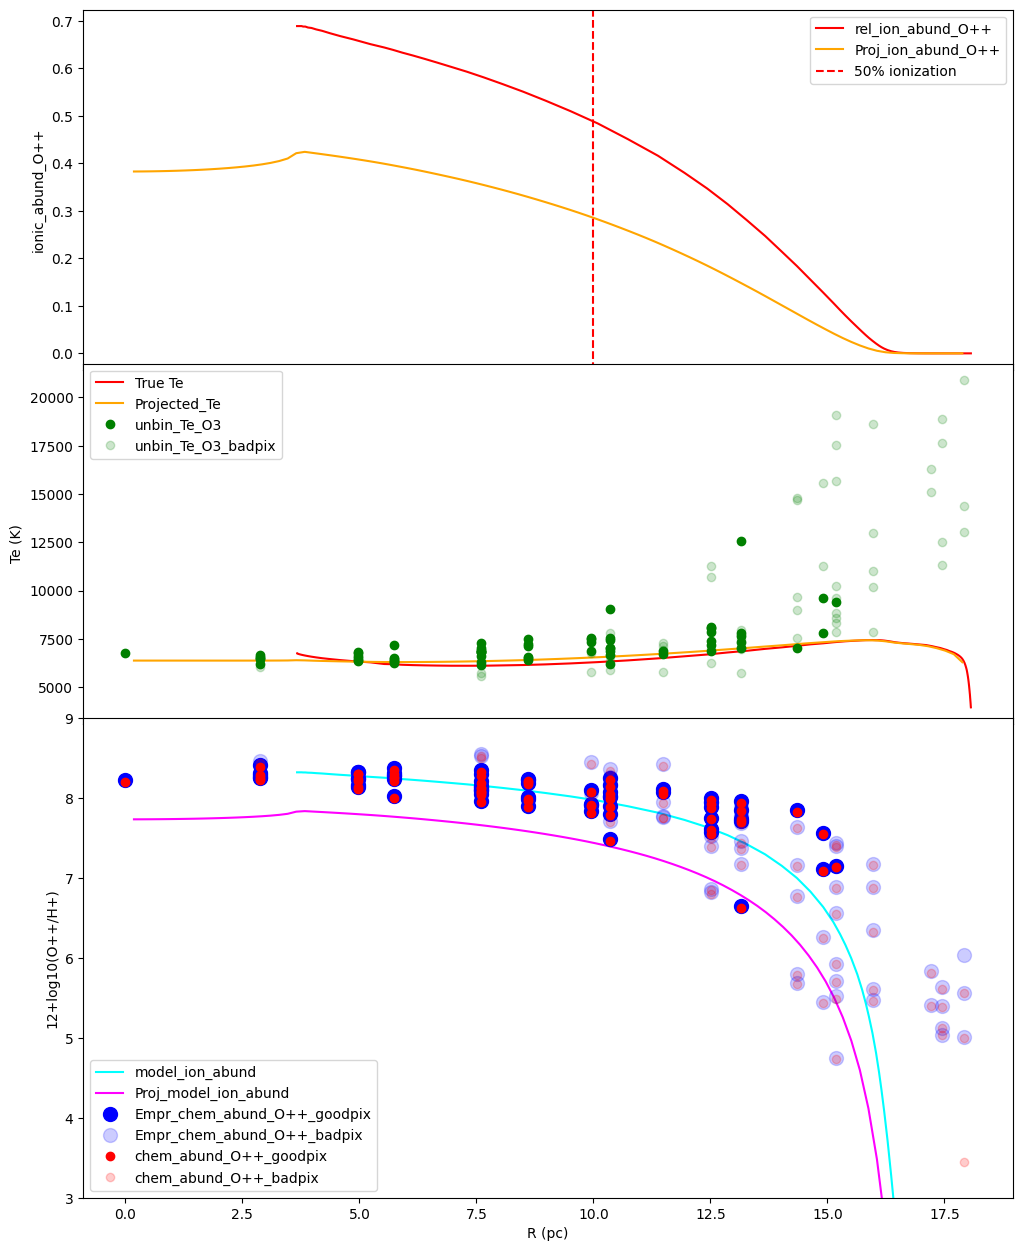

In [41]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

##########################################################################[OIII]###########################################################################
#O++ abundance 
TeO3=u.linefitdict['TeO3'] 

u.projectedTe(u.vals[6], n=100) 
u.chem_abund(5007)
I_4959=u.linefitdict['4959_flux']
I_5007=u.linefitdict['5007_flux']
I_4861=u.linefitdict['4861_flux']
Th=u.linefitdict['TeO3']/1e4 
 
Abund_O3=np.log10(np.divide((I_4959+I_5007),I_4861))+6.1868+np.divide(1.2491,Th)-0.5816*np.log10(Th) # from Perez-Montero 20?? 
print('th:', np.nanmean(Th),'\n','12+log10(O++/H+):', np.nanmean(Abund_O3))

good=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']>=3  
bad=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']<3    

#Plots
fig, (ax1, ax2, ax)=plt.subplots(3, 1, sharex=True, figsize=(12,12))  
ax1.plot(u.vals[0], u.vals[6], color='red', label='rel_ion_abund_O++')  
ax1.plot(u.R[1:], u.aproj[1:], color='orange', label='Proj_ion_abund_O++')  
ax1.axvline(x=10, c='red', linestyle='--', label='50% ionization')  
ax1.legend(loc='upper right')  
ax1.set_ylabel('ionic_abund_O++') 
  
# Electron temperature plots   
ax2.plot(u.vals[0], u.vals[1], color='red', label='True Te')  
ax2.plot(u.R, u.Teproj, color='orange', label='Projected_Te')  
ax2.plot(rad[good], TeO3[good], 'o', color='green', label='unbin_Te_O3')  
ax2.plot(rad[bad], TeO3[bad], 'o', color='green', label='unbin_Te_O3_badpix', alpha=0.2)  
#ax2.set_ylim(5000, 10000)
ax2.set_ylabel('Te (K)')  
ax2.legend()     
  
# O++ ionic abundance  
Zmodel=1   # cloudy model abundance relative to solar  
logOHsun= -3.31  # solar abundance patter from GASS (Grevesse et al 2010)  
logOHmodel = logOHsun + np.log(Zmodel) # total Oxygen elemental abundance in the model  
logOppHmodel = logOHmodel+np.log(u.vals[6]) # ionic abundance of O++ in the model  
logOppHproj = logOHmodel+np.log(u.aproj) # ionic abundance of O++ in the model  ############################### highliting because I put aproj[1:]#############
  
ax.plot(u.vals[0], 12+logOppHmodel, color='cyan', label='model_ion_abund')  
ax.plot(u.R, 12+logOppHproj, color='magenta', label='Proj_model_ion_abund')  
ax.set_ylim(3,9)  
  
ax.plot(rad[good], Abund_O3[good], 'o', color='blue', markersize='10', label='Empr_chem_abund_O++_goodpix')  
ax.plot(rad[bad], Abund_O3[bad], 'o', color='blue', markersize='10', label='Empr_chem_abund_O++_badpix', alpha=0.2)  
ax.plot(rad[good], 12+np.log10(u.OppH)[good], 'o', color='red', label='chem_abund_O++_goodpix')  
ax.plot(rad[bad], 12+np.log10(u.OppH)[bad], 'o', color='red', label='chem_abund_O++_badpix', alpha=0.2)  
  
ax.set_xlabel('R (pc)')  
ax.set_ylabel('12+log10(O++/H+)')  
ax.legend(loc='lower left')     
  
ax1.set_position([0.125, 0.89, 0.775, 0.3])  # [left, bottom, width, height]  
ax2.set_position([0.125, 0.595, 0.775, 0.3])   
ax.set_position([0.125, 0.2, 0.775, 0.4])  
    
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_plotprofile/unbin_TeO3_chem_abundO3_vs_R.png', dpi=500)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show()  

/home/amrita/LVM/lvmnebular/lvmnebular.py:762: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:763: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*np.cos(theta)**(-2), x=theta)/trapezoid(np.cos(theta)**(-2), x=theta)


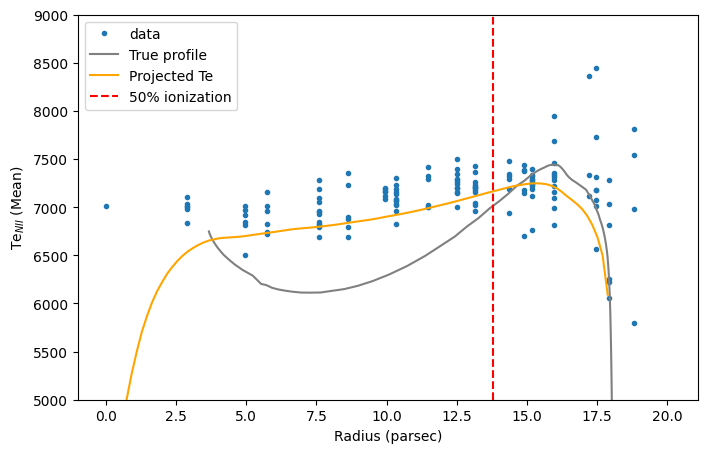

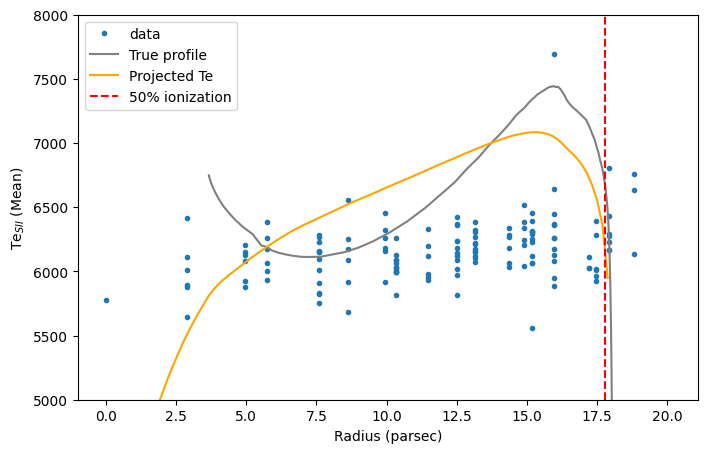

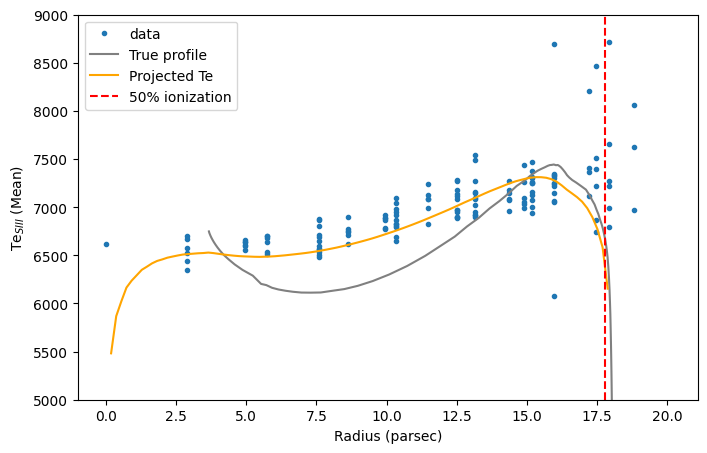

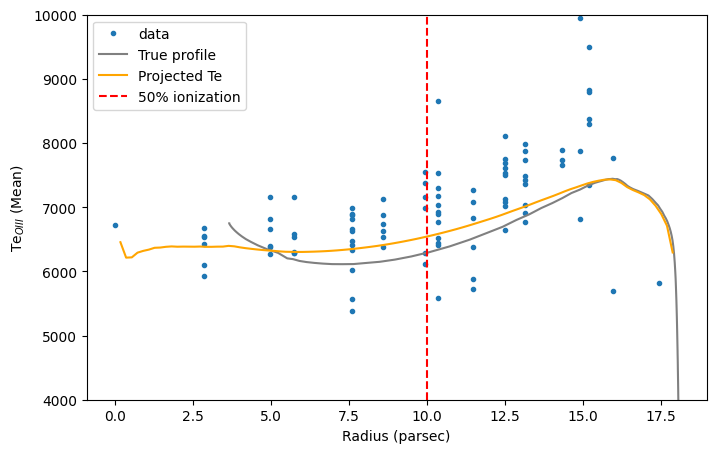

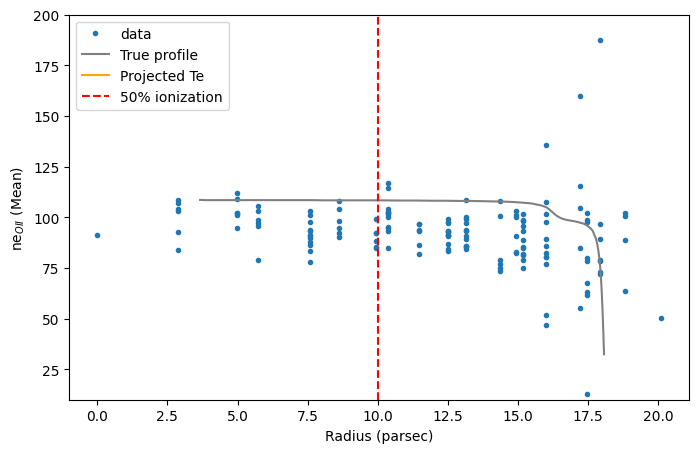

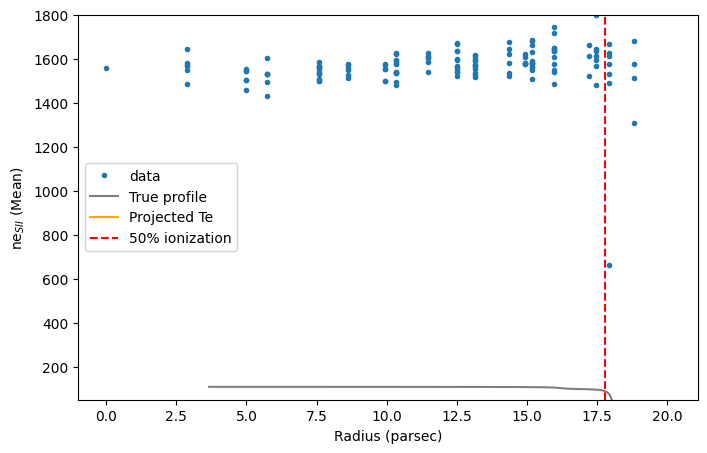

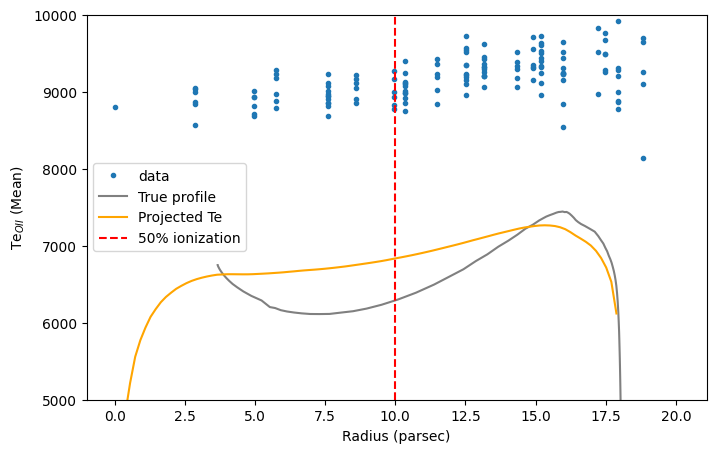

In [72]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#def overplotprofile(self, z, val1, val2, min, max, x, n, title='line_map', output='line_map', radbin=False, vorbin=False, snbin=False, pertsim=False)

u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], u.vals[8],  5000 , 9000, 13.8, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], u.vals[11], 5000 , 8000, 17.8, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], u.vals[12], 5000 , 9000, 17.8, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], u.vals[6],  4000 , 10000,10.0, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neO2'], u.vals[2], u.vals[5],  10 , 200,    10.0, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neS2'], u.vals[2], u.vals[11], 50 , 1800,   17.8, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], u.vals[5],  5000 , 10000,10.0, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, vorbin=False,  snbin=False)

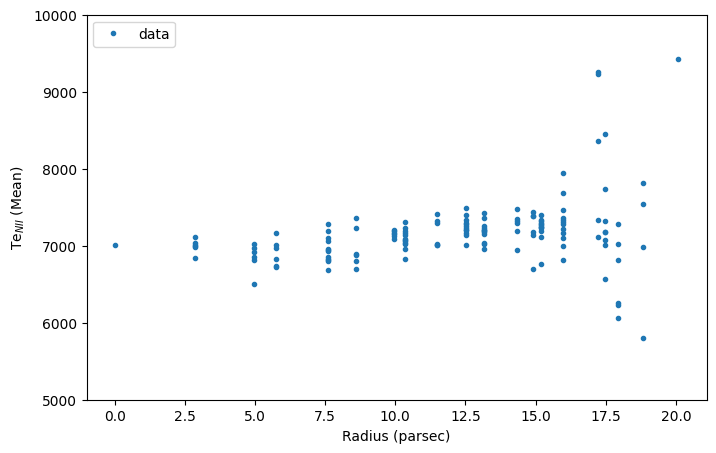

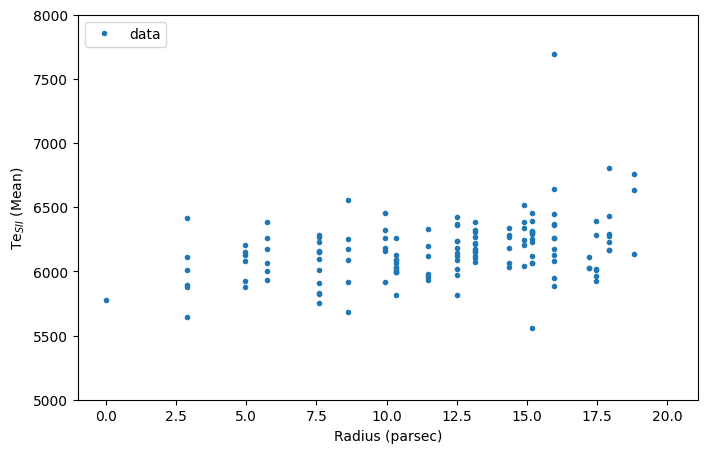

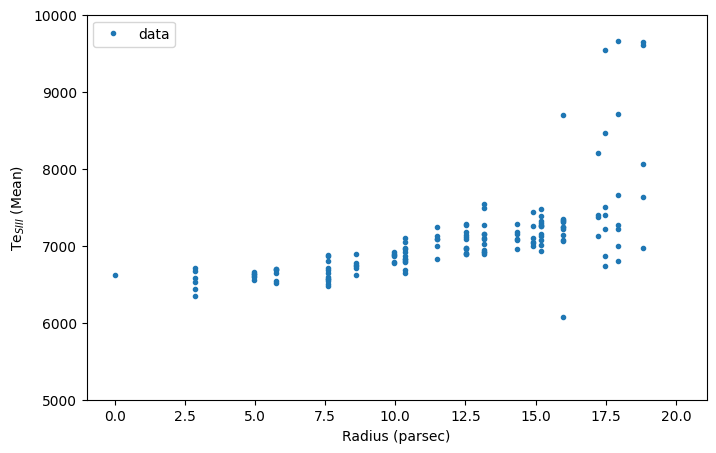

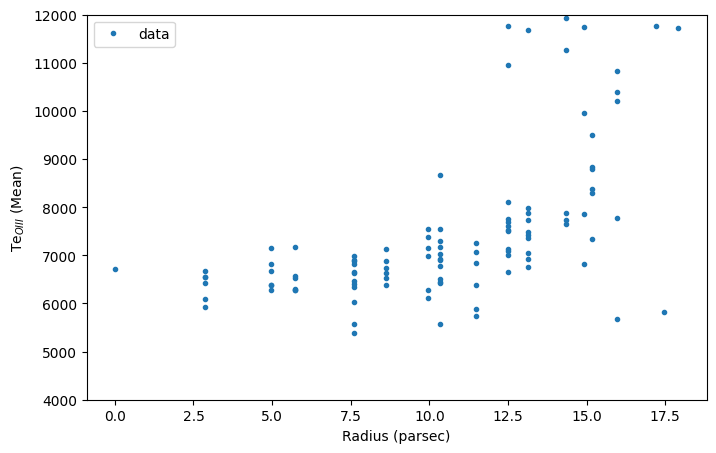

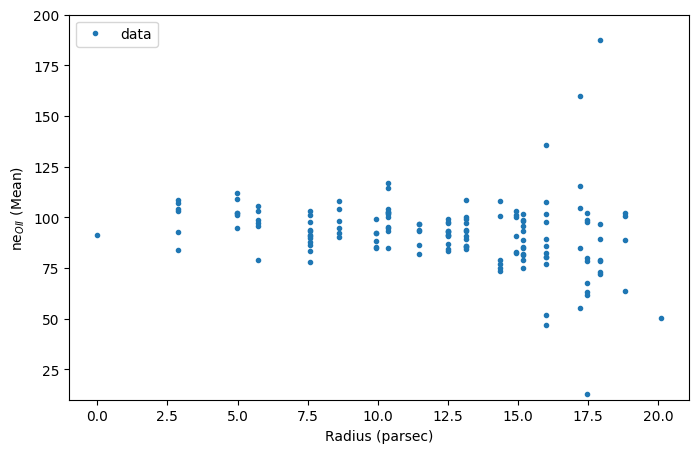

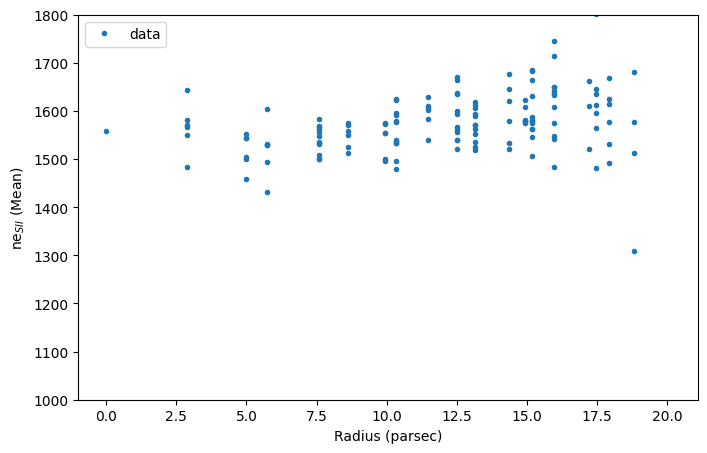

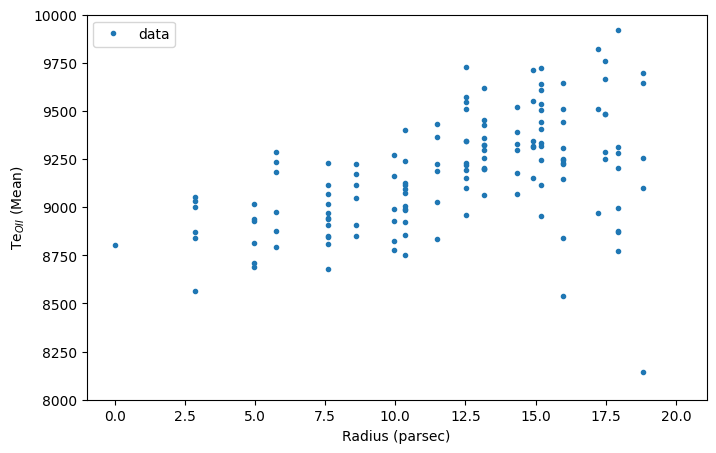

In [64]:
#MakeRadialbin plot profiles
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, snbin=False)



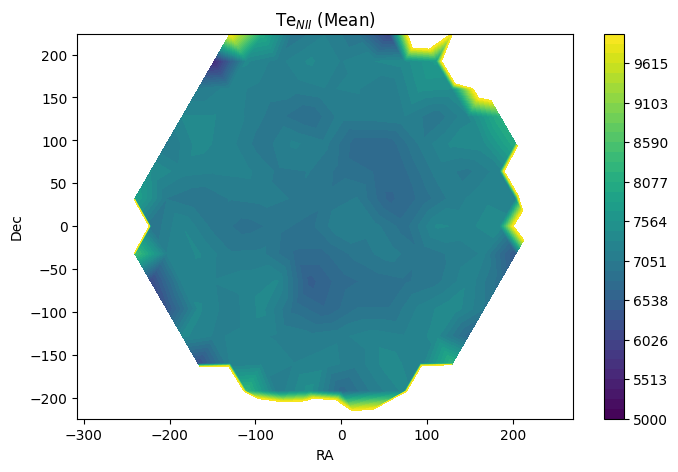

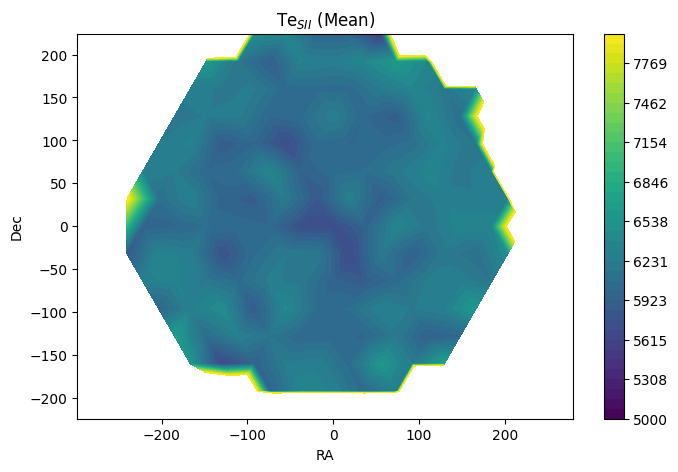

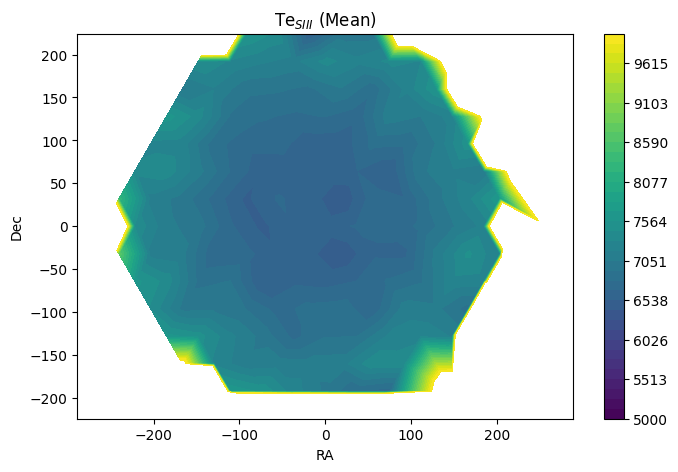

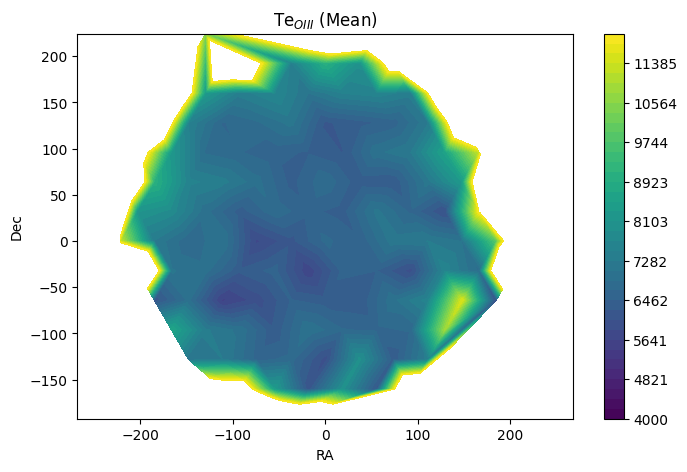

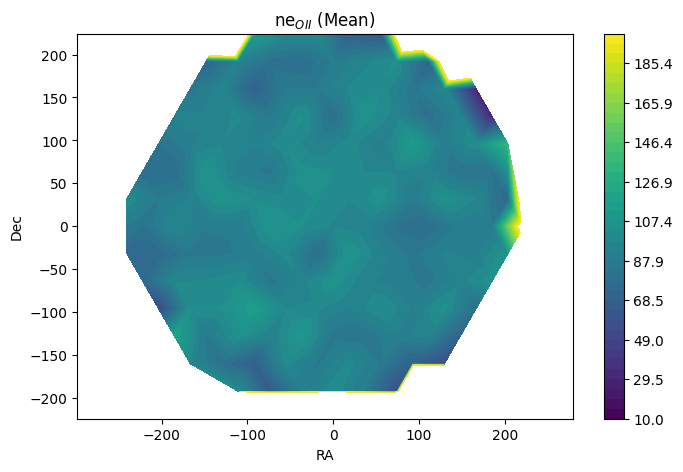

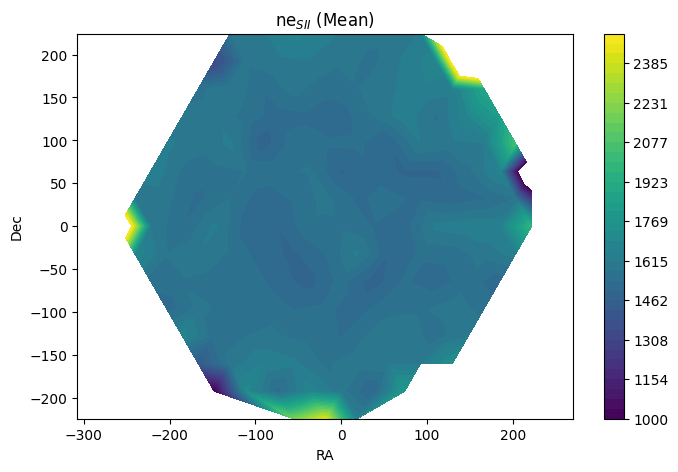

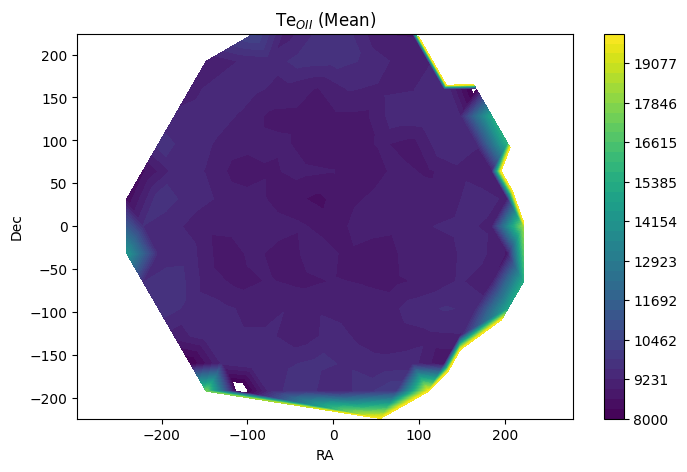

In [11]:
#Make plot profiles
u.plotmap(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', vorbin=False)
u.plotmap(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  vorbin=False)
u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',vorbin=False)
u.plotmap(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     vorbin=False)
u.plotmap(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  vorbin=False)
u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', vorbin=False)

In [ ]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2.2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 1.5, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac', vorbin=False)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 cm$^{-3}$')
plt.ylabel('Te O2 (K)')
plt.ylim(7000, 10000)
plt.xlim(50, 150)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)